<a href="https://colab.research.google.com/github/SangBeom-Hahn/BOAZ/blob/main/Dacon_Credit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# 컬럼부터 정리하고 가설을 세우는게 좋다
1. gender 성별
2. car 차량 소유 여부
3. reality 부동산 소유 여부
4. child_num 자녀 수
5. income_total 연간 소득
6. edu_type 교육 수준
7. family_type 결혼 여부
8. house_type 생활방식
9. income_type 소득 분류
10. DAYS_BIRTH 출생일
11. DAYS_EMPLOYED 업무 시작일
12. FLAG_MOBIL 핸드폰 소유 여부
13. work_phone 업무용 전화 소유 여부
14. phone 전화 소유 여부
15. email 이메일 소유 여부
16. occyp_type 직업 유형
17. family_size 가족 규모
18. begin_month 신용카드 발급 월
19. credit 신용도

In [ ]:
# 데이터 수집
df = pd.read_csv('/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/BOAZ 18기/22-1 방학 세션/분석 22-1 base 방학 세션/미니프로젝트/train.csv')
# df_Test = pd.read_csv('/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/BOAZ 18기/22-1 방학 세션/분석 22-1 base 방학 세션/미니프로젝트/test.csv')

In [ ]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


# ① 데이터 분석

In [ ]:
# ①데이터 분석

#데이터 확인
print(df.shape)
print(df.info())

(26457, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64

In [ ]:
#결측치 확인
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

일변량 변수 탐색 및 종속변수와의 관계 파악

0. 신용도(종속변수)
```
→ 낮은 값을 가질수록 높은 신용도라고 생각
→ 2로 신용도가 낮은 사람이 거의 절반 넘게 64% 존재
```

In [ ]:
df.credit.value_counts()/(16968+6267+3222)*100

2.0    64.134256
1.0    23.687493
0.0    12.178252
Name: credit, dtype: float64

1. 성별

In [ ]:
df.gender.value_counts()

F    17697
M     8760
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7fdf3af2d690>,
 [Text(-0.5566605258930385, 0.9487513156314914, 'F'),
  Text(0.5566606147215453, -0.9487512635131673, 'M')],
 [Text(-0.30363301412347554, 0.5175007176171771, '66.9%'),
  Text(0.3036330625753883, -0.5175006891890003, '33.1%')])

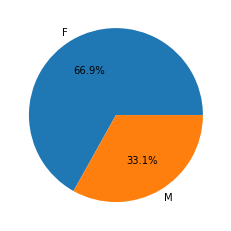

In [ ]:
plt.pie(pd.Series(df.gender.value_counts()/26457*100), labels=['F','M'], autopct='%.1f%%')

count    17697.000000
mean         1.518788
std          0.701732
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    8760.000000
mean        1.521119
std         0.703432
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: credit, dtype: float64


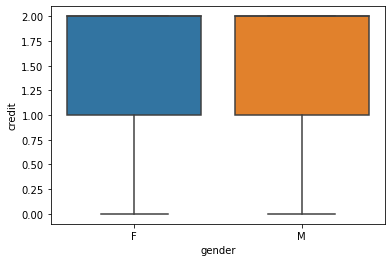

In [ ]:
sns.boxplot(x='gender', y='credit', data=df)
print(df[df.gender=='F'].credit.describe())
print()
print(df[df.gender=='M'].credit.describe())

#유의미한 차이는 없음

In [ ]:
pd.crosstab(df.credit, df.gender)

#성별별로 신용도의 분포는 거의 유사함

gender,F,M
credit,,
0.0,2148,1074
1.0,4220,2047
2.0,11329,5639


2. 차량 소유 여부

In [ ]:
df.car.value_counts()

N    16410
Y    10047
Name: car, dtype: int64

count    10047.000000
mean         1.526525
std          0.704404
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    16410.000000
mean         1.515296
std          0.700968
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64


car,N,Y
credit,,
0.0,1982,1240
1.0,3990,2277
2.0,10438,6530


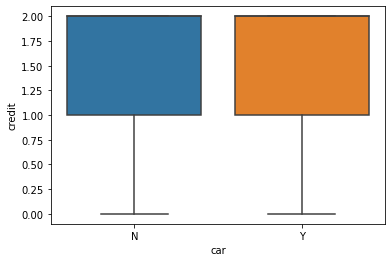

In [ ]:
sns.boxplot(x='car', y='credit', data=df)
print(df[df.car=='Y'].credit.describe())
print()
print(df[df.car=='N'].credit.describe())

pd.crosstab(df.credit, df.car)
#유의미한 차이는 없음

In [ ]:
#여기!!!!!!!

3. 부동산 소유 여부

In [ ]:
df.reality.value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

count    17830.000000
mean         1.514975
std          0.701333
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

count    8627.000000
mean        1.529037
std         0.704189
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: credit, dtype: float64


reality,N,Y
credit,,
0.0,1064,2158
1.0,1935,4332
2.0,5628,11340


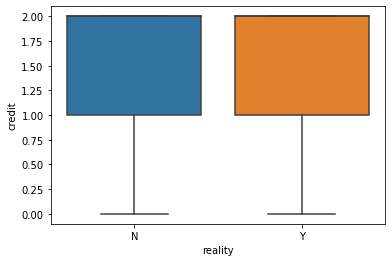

In [ ]:
sns.boxplot(x='reality', y='credit', data=df)
print(df[df.reality=='Y'].credit.describe())
print()
print(df[df.reality=='N'].credit.describe())

pd.crosstab(df.credit, df.reality)
#유의미한 차이는 없음

In [ ]:
#자동차와 부동산 소유 여부에 따른 
df['car_reality'] = df['car']+df['reality']    #임의의 car_reality 컬럼 생성
i=0
for i in range(0,df.shape[0]):
    if (df.car[i]=='N')&(df.reality[i]=='N'):
        df['car_reality']=='NN'
    elif (df.car[i]=='N')&(df.reality[i]=='Y'):
        df['car_reality']=='NY'
    elif (df.car[i]=='Y')&(df.reality[i]=='N'):
        df['car_reality']=='YN'
    else:
        df['car_reality']=='YY'

In [ ]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,NN
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,NY
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,YY
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,NY
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,YY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0,NN
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,...,-2475,1,0,0,0,NaN,2.0,-47.0,2.0,NY
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0,YN
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,-107,1,0,0,0,Laborers,1.0,-59.0,2.0,NY


In [ ]:
grouped = df['credit'].groupby(df['car_reality'])
grouped.describe()

#차는 없고, 집이 있는 사람의 신용도가 다른 경우에 비해 높았음

,count,mean,std,min,25%,50%,75%,max
car_reality,,,,,,,,
NN,5251.0,1.534374,0.694543,0.0,1.0,2.0,2.0,2.0
NY,11159.0,1.506318,0.703823,0.0,1.0,2.0,2.0,2.0
YN,3376.0,1.520735,0.718960,0.0,1.0,2.0,2.0,2.0
YY,6671.0,1.529456,0.696959,0.0,1.0,2.0,2.0,2.0


In [ ]:
grouped = df['income_total'].groupby(df['car_reality'])
grouped.describe()

#그렇다고 car_reality=='NY'인 사람의 연간소득이 다른 범주에 비해 높은 것은 아니었음

,count,mean,std,min,25%,50%,75%,max
car_reality,,,,,,,,
NN,5251.0,164107.806513,79569.893054,27000.0,112500.0,144000.0,202500.0,990000.0
NY,11159.0,173203.390985,91626.086258,27000.0,112500.0,157500.0,202500.0,945000.0
YN,3376.0,210149.268217,111424.076687,31500.0,135000.0,184500.0,261000.0,1350000.0
YY,6671.0,217598.269675,117983.596536,29250.0,135000.0,198000.0,270000.0,1575000.0


In [ ]:
print(df[(df.car_reality=='NY')&(df.income_total<173203.39)].credit.mean(), '연간 소득이 평균보다 낮은 고객 신용도')
print(df[(df.car_reality=='NY')&(df.income_total>173203.39)].credit.mean(), '연간 소득이 평균보다 높은 고객 신용도')

1.5039879608728368 연간 소득이 평균보다 낮은 고객 신용도
1.509747452370403 연간 소득이 평균보다 높은 고객 신용도


4. 자녀 수

In [ ]:
df.child_num.value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

자녀수가 7 이상으로 이상치로 보이는 고객 분석
```
1. 결혼여부
```

In [ ]:
print(df[df.child_num==7].family_type.value_counts())
print(df[df.child_num==14].family_type.value_counts())
print(df[df.child_num==19].family_type.value_counts())

#자녀 수가 19인 사람은 결혼도 안한 사람인데 자녀수가 19명이므로 제거가 필요

Married    2
Name: family_type, dtype: int64
Separated    3
Name: family_type, dtype: int64
Single / not married    1
Name: family_type, dtype: int64


```
2. 가족 규모
```

In [ ]:
print(df[df.child_num==7].family_size.value_counts())
print(df[df.child_num==14].family_size.value_counts())
print(df[df.child_num==19].family_size.value_counts())

#가족 규모에 대해서는 모두 자녀수 value값이 더 작았음

9.0    2
Name: family_size, dtype: int64
15.0    3
Name: family_size, dtype: int64
20.0    1
Name: family_size, dtype: int64


In [ ]:
(df.child_num > df.family_size).sum()
df[(df.child_num > df.family_size)]

#딱 한 경우 존재했는데, 한부모가정일수도 있으니 삭제하지 않음

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,car_reality
14900,14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2212,1,0,0,0,Drivers,1.0,-30.0,2.0,YN


```
3. 출생일
: 양수로 변환 후, 365로 나누어서 대략적인 나이 추측 가능하도록 변환
: 나이가 어린데 자녀수가 많이 존재하면 이상치라고 판단 > 그런 고객은 존재하지 않았음
```

In [ ]:
df.DAYS_BIRTH = -df.DAYS_BIRTH

In [ ]:
df.DAYS_BIRTH = df.DAYS_BIRTH/365
df.DAYS_BIRTH

0        38.079452
1        31.178082
2        52.293151
3        41.336986
4        41.197260
           ...    
26452    33.093151
26453    41.893151
26454    27.621918
26455    27.794521
26456    53.613699
Name: DAYS_BIRTH, Length: 26457, dtype: float64

In [ ]:
#나이가 21살 아래이면서 자녀수가 존재하거나 많은 고객은 없었음
df[df.DAYS_BIRTH<21].child_num.value_counts()

Series([], Name: child_num, dtype: int64)

5. 연간 소득

In [ ]:
np.set_printoptions(precision=10)

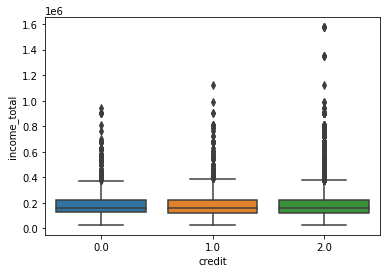

In [ ]:
sns.boxplot(x='credit', y='income_total', data=df)

#일단 보기에, 신용도가 낮은 고객일수록 연간소득이 큰 사람이 많았음
#그러나 신용도가 2인 고객이 애초에 많았고, 이상치의 영향 제거 > 중앙값으로 판단

In [ ]:
df['income_total'].groupby(df['credit']).describe()

#실제로 신용도가 높은 사람들의 연간 소득이 높은 것을 확인할 수 있었음

,count,mean,std,min,25%,50%,75%,max
credit,,,,,,,,
0.0,3222.0,190807.582402,102139.548208,29250.0,126000.0,162000.0,225000.0,945000.0
1.0,6267.0,181122.701532,92548.262258,27000.0,117000.0,157500.0,225000.0,1125000.0
2.0,16968.0,188925.666991,104981.727565,27000.0,121500.0,157500.0,225000.0,1575000.0


6. 소득 분류

In [ ]:
df.income_type.value_counts()

In [ ]:
sns.boxplot(x='income_type', y='income_total', data=df)

In [ ]:
#학생인 사람의 결혼여부와 출생일 확인

print(df[(df.income_type=='Student')].family_type.value_counts())
print()
print(df[df.income_type=='Student'].DAYS_BIRTH)

# 2990/3602/8936/21681 와 11646/23119 중복데이터??

7. 교육 수준

In [ ]:
df.edu_type.value_counts()

In [ ]:
pd.crosstab(df.credit, df.edu_type)

#교육수준에 따라서 신용도의 분포가 유사하고, Academic degree에서는 샘플수가 작아서 조금의 오차를 보이는 것 같음

8. 결혼 여부

In [ ]:
df.family_type.value_counts()

In [ ]:
pd.crosstab(df.credit, df.family_type)

9. 출생일

In [ ]:
df.DAYS_BIRTH = df.DAYS_BIRTH*365

In [ ]:
df.DAYS_BIRTH.describe()

10. 업무 시작일

In [ ]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED']>0, 0, -df['DAYS_EMPLOYED'])
df.DAYS_EMPLOYED.describe()

count    26457.000000
mean      2198.529538
std       2370.140530
min          0.000000
25%        407.000000
50%       1539.000000
75%       3153.000000
max      15713.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
df['DAYS_BIRTH'] = np.where(df['DAYS_BIRTH']>0, 0, -df['DAYS_BIRTH'])

In [ ]:
print(sum((df.DAYS_BIRTH)<(df.DAYS_EMPLOYED)), '으로 근무일수가 태어난 날보다 많은 이상치는 없었음')

22019 으로 근무일수가 태어난 날보다 많은 이상치는 없었음


In [ ]:
boolean = [True, True]
print(sum(boolean))

2


11. 핸드폰 소유 여부
```
: 모두 1의 value를 가지므로 컬럼 삭제
```

12. 업무용 전화 소유 여부

13. 전화 소유 여부

14. 이메일 소유 여부

15. 직업 유형

In [ ]:
#너무 많은 수준이 존재하므로, 상위 클래스로 묶어주는 작업 필요
#직업 자체가 없어서 결측치인 사람, 입력 오류로 결측치인 사람의 구분 필요
#근무일수가 없는 직업유형은 어떤 범주로 전처리 ?
df.occyp_type.value_counts()

In [ ]:
df.occyp_type.isnull().sum()

In [ ]:
df[(df.occyp_type.isnull())&(df.DAYS_EMPLOYED==0)]

# ② 데이터 시각화로 분석

NameError: ignored

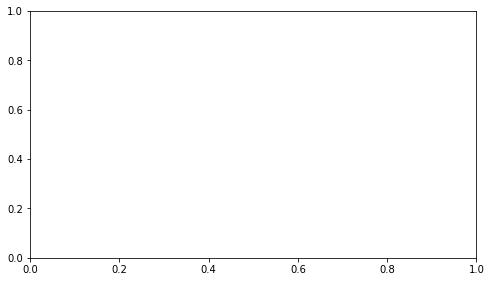

In [ ]:
# 연속형 데이터 시각화

# 분석 내용 1. 신용등급이 가장 낮은 그룹이 총 수입이 높게 분포 
# -> 샘플의 갯수를 세어보니 약 13000개 정도 많음 
# -> 가장 적은 등급의 샘플 갯수를 기준으로 랜덤 샘플링 
# -> 이상하다고 생각할 정도는 아닌 결과 

plt.figure(figsize = (8, 10))
plt.subplot(211)
plt.scatter(df_Train['credit'], df_Train['income_total'])

plt.subplot(212)
plt.scatter(df_Train['credit'], df_Train['DAYS_BIRTH'])
plt.show()

In [ ]:
# ②데이터 시각화로 분석

# 연속형 데이터

# 분석 내용 1. 신용등급이 가장 낮은 그룹이 총 수입이 높게 분포 
# -> 샘플의 갯수를 세어보니 약 13000개 정도 많음 
# -> 가장 적은 등급의 샘플 갯수를 기준으로 랜덤 샘플링 
# -> 이상하다고 생각할 정도는 아닌 결과 

plt.figure(figsize = (8, 10))
plt.subplot(211)
plt.scatter(df_Train['credit'], df_Train['income_total'])

plt.subplot(212)
plt.scatter(df_Train['credit'], df_Train['DAYS_BIRTH'])
plt.show()

In [ ]:
# 14000명의 차이
df_Train.groupby('credit').count()[['car']]

```
불편향 데이터 일반화 작업
```

In [ ]:
# 신용등급 0, 1, 2별 3000명씩만 뽑기
df_0 = df_Train[ df_Train['credit'] == 0 ]
df_1 = df_Train[ df_Train['credit'] == 1 ]
df_2 = df_Train[ df_Train['credit'] == 2 ]

df_0 = df_0.reset_index()
df_1 = df_1.reset_index()
df_2 = df_2.reset_index()

rand0 = np.random.choice(df_0.shape[0], 3000)
rand1 = np.random.choice(df_1.shape[0], 3000)
rand2 = np.random.choice(df_2.shape[0], 3000)


# Exp 데이터 프레임 = credit 별로 3000명 맞춘 데이터
df_Train_Exp = pd.concat([df_0.loc[rand0], df_1.loc[rand1], df_2.loc[rand2]], ignore_index = True)

In [ ]:
df_Train_Exp

```
3000명으로 기준을 잡으니 신용도가 제일 낮은 그룹에서 수입이 제일 높은 상황 사라짐
```

In [ ]:
plt.figure(figsize = (8, 10))
plt.scatter(df_Train_Exp['credit'], df_Train_Exp['income_total'])
plt.show()

In [ ]:
df_Train.groupby('credit').count()[['DAYS_BIRTH']]

In [ ]:
# 데이터가 너무커서 catplot이 되지않아 스플릿 데이터 500개 추출
rand = np.random.choice(df_Train.shape[0], 500)

# 1. 전반적으로 나이가 어림
# 2. 나이가 많을수록 업무일 수도 많음
sns.catplot(x = 'DAYS_EMPLOYED', y = 'DAYS_BIRTH', data = df_Train.loc[rand], col = 'credit', col_wrap=3)
plt.show()

In [ ]:
# 범주형 데이터 

#barplot : 평균 그래프
sns.barplot(x = 'car', y = 'credit', data=df_Train_Exp, color = "yellow")
plt.show()

# 수량을 맞추니 1.0가 나오는 모습 -> 수량을 맞추지 않으면 2등급이 너무 많아서 1.5가 평균으로 나옵니다.
df_Train_Exp.groupby('car').mean()[['credit']]

```
막대그래프와 히스토그램은 평균을 보여줌
따라서 신용도 2가 가장 많은 데이터에서 1이 아닌 1.5의 편향성을 보였음
```

In [ ]:
# kt식 pivot으로 그래프 그리는 방식

# Exp2 = edu_type을 인덱스로 한 데이터 프레임
df_Train_Exp2 = df_Train.pivot_table(index = ['edu_type'])
df_Train_Exp2['credit'].plot(kind = "bar", color = "pink")
plt.show()

In [ ]:
# 3 = child_num을 인덱스로한 데이터 프레임
df_Train_Exp3 = df_Train.pivot_table(index = ['child_num'])
df_Train_Exp3['credit'].plot(kind = "bar", color = "yellow")
plt.show()

In [ ]:
#하나의 특성에 대한 범주 값들의 분포를 그래프로 출력

ot = train.groupby('occyp_type').count()['index']
plot = ot.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('job_type',fontsize=11)
plot.set_ylabel('number',fontsize=11)
plot.set_title('job_type by number',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

```
여기서부터 목적을 정하기 위한 가설 시작
```

In [ ]:
sns.heatmap(df_Train.corr(), linewidths = 6, cmap="RdBu", annot = True) 
plt.show()

In [ ]:
# 가설 1 -> 부동산 소유시 신용도가 낮은 비욜이 증가하나? 
df_Train['reality'].value_counts()

In [ ]:
df_Reality_Y = df_Train[df_Train['reality'] == 'Y']
df_Reality_N = df_Train[df_Train['reality'] == 'N']

```
항상 (편향데이터 외에도) 여러가지 조건으로 시각화를 해봐야한다.
```

In [ ]:
sns.countplot('credit', palette = 'spring', data = df_Reality_Y)
plt.show()

sns.countplot('credit', palette = 'spring', data = df_Reality_N)
plt.show()

In [ ]:
# 가설 2 -> 자녀 수, 결혼 여부에 따른 신용도
df_Train['child_num'].value_counts()

In [ ]:
# 내 로컬 코드 참조
'''
print(df_Train['credit'].value_counts(),'\n\n\n\n',df_Child0_M['credit'].value_counts(),\
      '\n\n\n\n',df_Child1_M['credit'].value_counts(),'\n\n\n\n', df_Child2_M['credit'].value_counts())
      # '\n\n\n\n',df_Child3_M['credit'].value_counts(),'\n\n\n\n', df_Child4_M['credit'].value_counts(),\
      # '\n\n\n\n',df_Child5_M['credit'].value_counts())

print('\n\n\n\n',df_Child0_S['credit'].value_counts(),\
      '\n\n\n\n',df_Child1_S['credit'].value_counts(),'\n\n\n\n', df_Child2_S['credit'].value_counts())
      # '\n\n\n\n',df_Child3_S['credit'].value_counts(),'\n\n\n\n', df_Child4_S['credit'].value_counts(),\
      # '\n\n\n\n',df_Child5_S['credit'].value_counts())
      '''

```
2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64 



 2.0    1230
1.0     450
0.0     236
Name: credit, dtype: int64 



 2.0    1418
1.0     477
0.0     295
Name: credit, dtype: int64 



 2.0    1780
1.0     588
0.0     291
Name: credit, dtype: int64




 2.0    322
1.0    144
0.0     50
Name: credit, dtype: int64 



 2.0    144
1.0     83
0.0     22
Name: credit, dtype: int64 



 2.0    62
1.0    11
0.0     7
Name: credit, dtype: int64
```

In [ ]:
# ③데이터 전처리

# 의미없는 값 제거
df_Total['FLAG_MOBIL'].value_counts() 

In [ ]:
df_Total.isnull().sum()

In [ ]:
df_Total = df_Total.fillna(method = "bfill")

In [ ]:
# 상관관계가 높은 특성의 이상치 탐지
sns.boxplot(x = df_Total['DAYS_BIRTH'], y = df_Total['DAYS_EMPLOYED'], data = df_Total, palette = "RdBu")
plt.show()

In [ ]:
sns.boxplot(x = df_Total['family_size'], y = df_Total['child_num'], data = df_Total, palette = "RdBu")
plt.show()

In [ ]:
# 자식수 10명 이상 제거
df_Total[ df_Total['child_num'] > 10 ]

In [ ]:
df_Total = df_Total[ df_Total['child_num'] <= 10 ]

→ 추가적인 이상치 분석에 대한 Question
```
1) 자녀수가 가족수보다 많거나 같은 경우인 6개의 샘플 → 삭제?
2) 결혼여부가 싱글/미혼인데 자녀가 존재하는 509개의 샘플 → 삭제?
```

In [ ]:
df[(df.family_type=='Single / not married')&(df.child_num>0)].child_num.value_counts()

#싱글/미혼인데 자녀수가 6인 고객도 존재함

(1)  income_total(연간소득)
```
: 박스플롯을 살펴보면 이상치가 많이 존재하는 것을 확인했고, 극단적 이상치로 보이는 1,200,000 이상의 값을 1,200,000으로 변환
```

In [ ]:
plt.boxplot(df.income_total)

In [ ]:
df.at[df.income_total>1200000,'income_total'] = 1200000

(2) family_size(가족 규모) ★★★ 매우 좋은 분석
법
```
: 전체 관측치 중에서 8 이상의 값을 가지는 샘플은 0.06%의 이상치라고 판단, 모두 8로 치환
: 이때 싱글/미혼인데 자녀가 존재하는 샘플 → 이상치로 생각됨 !
```

In [ ]:
print(df.family_size.value_counts())

(9+3+2+1)/26457*100

In [ ]:
plt.boxplot(df.family_size)

In [ ]:
df[df.family_size>8][['family_size','child_num','family_type','DAYS_BIRTH']]

#실제로 가족규모가 8 초과인 샘플들의 가족규모, 자녀수, 결혼여부, 나이 등에서 모순점은 찾을 수 없었지만
#너무 특이한 값을 가지므로, 이상치로 판단하여 최대의 가족수를 모두 8로 치환해준다.

In [ ]:
df[df.family_type=='Single / not married'].child_num.value_counts()

#싱글/미혼인데 자녀가 존재한다? → 이상치로 생각됨

df[df.index==10731][['family_size','child_num','family_type']]

In [ ]:
df.at[df.family_size>8, 'family_size'] = 8

(3) begin month(신용카드 발급 월)
```
: 이상치는 따로 없었고, 식별하기 쉽도록 부호만 변경해주었음
: 이후 태어난 월 수보다 신용카드 발급 월 수가 많으면 이상치인 점을 탐색해보기
```

In [ ]:
df.begin_month = (-1)*df.begin_month

In [ ]:
plt.boxplot(df.begin_month)

#이상치는 따로 없어보이고, 식별하기 쉽도록 부호만 변경해주었음

(4) DAYS_BIRTH(출생일)
```
: 부호 변경과 함께, 나이로 직관적인 판단을 위해서 년 단위로 치환
```

In [ ]:
df.DAYS_BIRTH = (-1)*df.DAYS_BIRTH /365   

In [ ]:
#신용카드 발급 월 수와 태어난 월 수 
df[(df.DAYS_BIRTH*30 < df.begin_month)].shape

#예상했던 모순적인 샘플은 존재하지 않았음

In [ ]:
#출생일과 업무 시작일
df[(df.DAYS_BIRTH*365<=((-1)*df.DAYS_EMPLOYED))].shape

#예상했던 모순적인 샘플은 존재하지 않았음

(5) DAYS_EMPLOYED(업무 시작일)
```
: 기존 value값에서는 0이 최대여야하지만 양수가 존재, 양수를 0으로 치환
: 부호값을 변경하고, 직관적인 비교를 위해 월 단위로 치환
```

In [ ]:
df.DAYS_EMPLOYED.value_counts()

In [ ]:
df.at[df.DAYS_EMPLOYED>0,'DAYS_EMPLOYED'] = 0
df.DAYS_EMPLOYED = (-1)*df.DAYS_EMPLOYED/30

In [ ]:
df.DAYS_EMPLOYED.value_counts()

(6) child_num(자녀수)

In [ ]:
df.child_num.value_counts()

In [ ]:
plt.boxplot(df.child_num)

#결국 자녀수가 7 이상인 샘플은 이상치로 판단되고, 6으로 치환해준다. 

In [ ]:
df.at[df.child_num>=6, 'child_num'] = 6

(+) 추가적인 이상치 분석
```
: 자녀수가 가족수보다 많거나 같은 경우인 6개의 샘플 → 삭제?
```

In [ ]:
df[(df.child_num>=df.family_size)][['child_num','family_size','family_type']]